In [102]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [105]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [106]:
df = pd.read_excel('Platinum_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

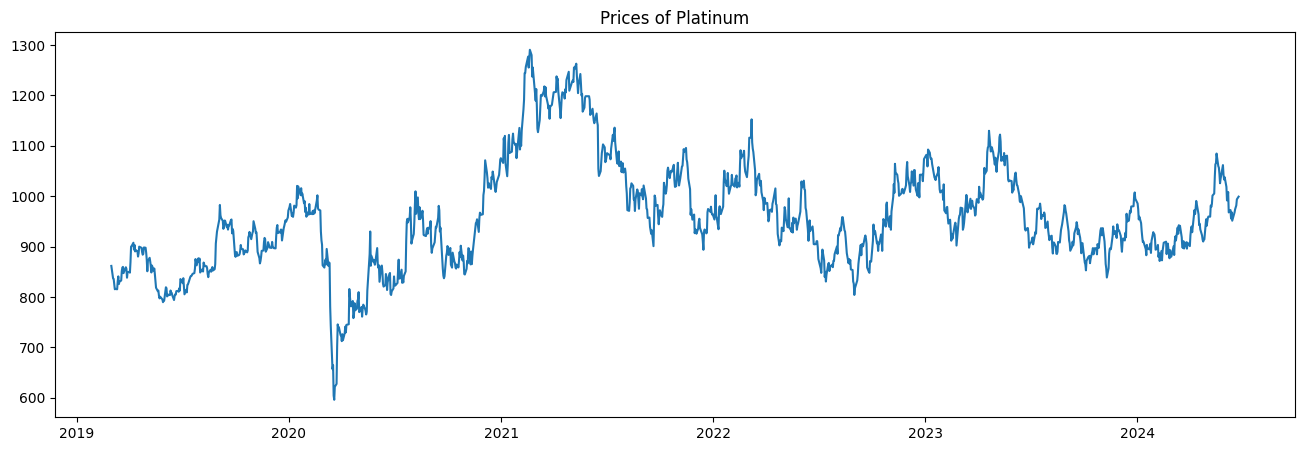

In [108]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Platinum')
    plt.show()

In [109]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,861.599976,861.599976,861.599976,861.599976,0
2019-03-04,2019-03-04,836.799988,836.799988,836.799988,836.799988,0
2019-03-05,2019-03-05,840.200012,840.200012,835.900024,835.900024,2
2019-03-06,2019-03-06,828.299988,828.400024,826.200012,826.200012,2
2019-03-07,2019-03-07,825.000000,825.000000,815.299988,815.299988,4
...,...,...,...,...,...,...
2024-06-17,2024-06-17,963.200012,967.799988,961.200012,967.799988,8
2024-06-18,2024-06-18,974.099976,974.099976,974.099976,974.099976,8
2024-06-20,2024-06-20,981.599976,981.599976,981.599976,981.599976,8
2024-06-21,2024-06-21,993.700012,993.700012,993.700012,993.700012,8


In [110]:
# Split dataset 

In [111]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [112]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [113]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [114]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.25291, saving model to save_model_7_2_1.keras
17/17 - 3s - 171ms/step - loss: 0.2529
Epoch 2/80

Epoch 2: loss improved from 0.25291 to 0.08381, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0838
Epoch 3/80

Epoch 3: loss improved from 0.08381 to 0.06619, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0662
Epoch 4/80

Epoch 4: loss improved from 0.06619 to 0.05949, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0595
Epoch 5/80

Epoch 5: loss improved from 0.05949 to 0.05674, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0567
Epoch 6/80

Epoch 6: loss improved from 0.05674 to 0.05209, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0521
Epoch 7/80

Epoch 7: loss improved from 0.05209 to 0.05084, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0508
Epoch 8/80

Epoch 8: loss did not improve from 0.05084


In [115]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (828, 1)
Predicted y_train shape: (828, 1)


In [116]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [117]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [118]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [119]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.583939254283905], [0.5865378379821777], [0.5894002318382263], [0.5933996438980103], [0.5987282991409302], [0.6052926182746887], [0.6128000020980835], [0.6208873391151428], [0.6292223334312439], [0.6375603079795837], [0.6457622647285461], [0.6537835597991943], [0.6616466641426086], [0.6694107055664062], [0.6771439909934998], [0.6849057674407959], [0.6927375197410583], [0.7006613612174988], [0.7086843252182007], [0.7168039679527283], [0.7250135540962219], [0.7333074808120728], [0.7416832447052002], [0.7501420974731445], [0.7586886882781982], [0.7673293352127075], [0.7760709524154663], [0.7849200367927551], [0.7938817143440247], [0.8029593825340271]]


In [120]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [121]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1001.56259585]
 [1003.36783182]
 [1005.35633669]
 [1008.13472806]
 [1011.83654459]
 [1016.39677677]
 [1021.61215595]
 [1027.23042858]
 [1033.02074873]
 [1038.81313924]
 [1044.51103819]
 [1050.08343148]
 [1055.54592969]
 [1060.93960888]
 [1066.31192189]
 [1071.70402761]
 [1077.14474555]
 [1082.64943784]
 [1088.22299054]
 [1093.86370595]
 [1099.56690504]
 [1105.32869553]
 [1111.1473383 ]
 [1117.0237029 ]
 [1122.96101912]
 [1128.96367612]
 [1135.03647716]
 [1141.18393565]
 [1147.40961261]
 [1153.71586825]]


In [122]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

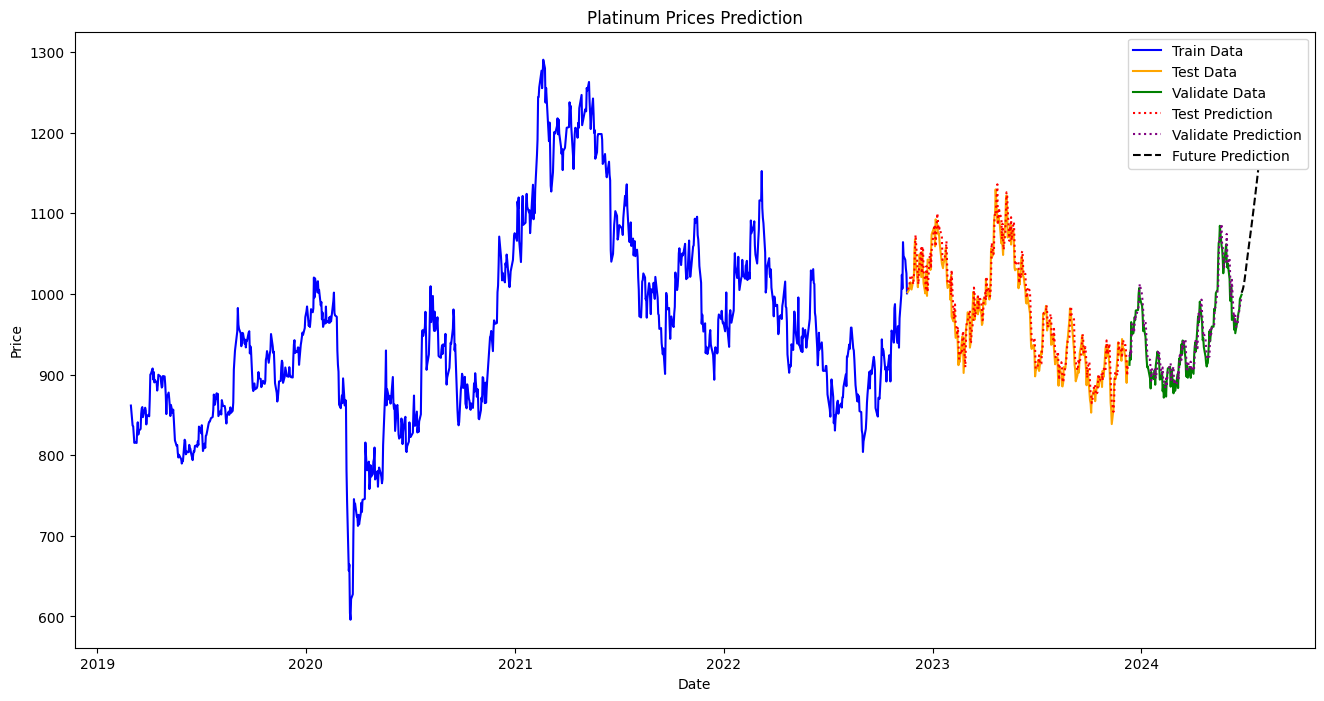

In [124]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [125]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.447602124484066
MAPE:  1.487571747680121
RMSE:  18.117587629752244

** Validate **
MAE:  12.910014138292928
MAPE:  1.368777583365107
RMSE:  16.040552810367117


In [126]:
# Split dataset 6-3-1

In [127]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [128]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [129]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [130]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19869, saving model to save_model_6_3_1.keras
14/14 - 3s - 198ms/step - loss: 0.1987
Epoch 2/80

Epoch 2: loss improved from 0.19869 to 0.08212, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0821
Epoch 3/80

Epoch 3: loss improved from 0.08212 to 0.06969, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0697
Epoch 4/80

Epoch 4: loss improved from 0.06969 to 0.06277, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0628
Epoch 5/80

Epoch 5: loss improved from 0.06277 to 0.05495, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0549
Epoch 6/80

Epoch 6: loss improved from 0.05495 to 0.05022, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0502
Epoch 7/80

Epoch 7: loss improved from 0.05022 to 0.04885, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0489
Epoch 8/80

Epoch 8: loss did not improve from 0.04885


In [131]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [132]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [133]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [134]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [135]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5734704732894897], [0.5663544535636902], [0.5587590336799622], [0.5528935790061951], [0.5493166446685791], [0.5478681921958923], [0.5479438900947571], [0.5488108396530151], [0.5498262643814087], [0.5505490303039551], [0.5507639646530151], [0.5504450798034668], [0.5496906042098999], [0.5486544966697693], [0.5474897027015686], [0.5463147759437561], [0.5451996326446533], [0.5441691875457764], [0.5432149171829224], [0.5423104166984558], [0.5414242148399353], [0.5405296683311462], [0.5396091938018799], [0.5386550426483154], [0.5376678705215454], [0.5366531014442444], [0.5356186032295227], [0.5345720648765564], [0.5335192084312439], [0.532463788986206]]


In [136]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [137]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[994.28993421]
 [989.34643565]
 [984.06989783]
 [979.99516675]
 [977.51027064]
 [976.50403078]
 [976.55661811]
 [977.15888792]
 [977.86430343]
 [978.36640888]
 [978.51572377]
 [978.29419448]
 [977.77006032]
 [977.05027646]
 [976.24109415]
 [975.42487259]
 [974.65018259]
 [973.93433243]
 [973.27140086]
 [972.64304441]
 [972.02740003]
 [971.40595861]
 [970.766505  ]
 [970.10365624]
 [969.41786781]
 [968.71290778]
 [967.99424192]
 [967.26721178]
 [966.53579246]
 [965.80259262]]


In [138]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

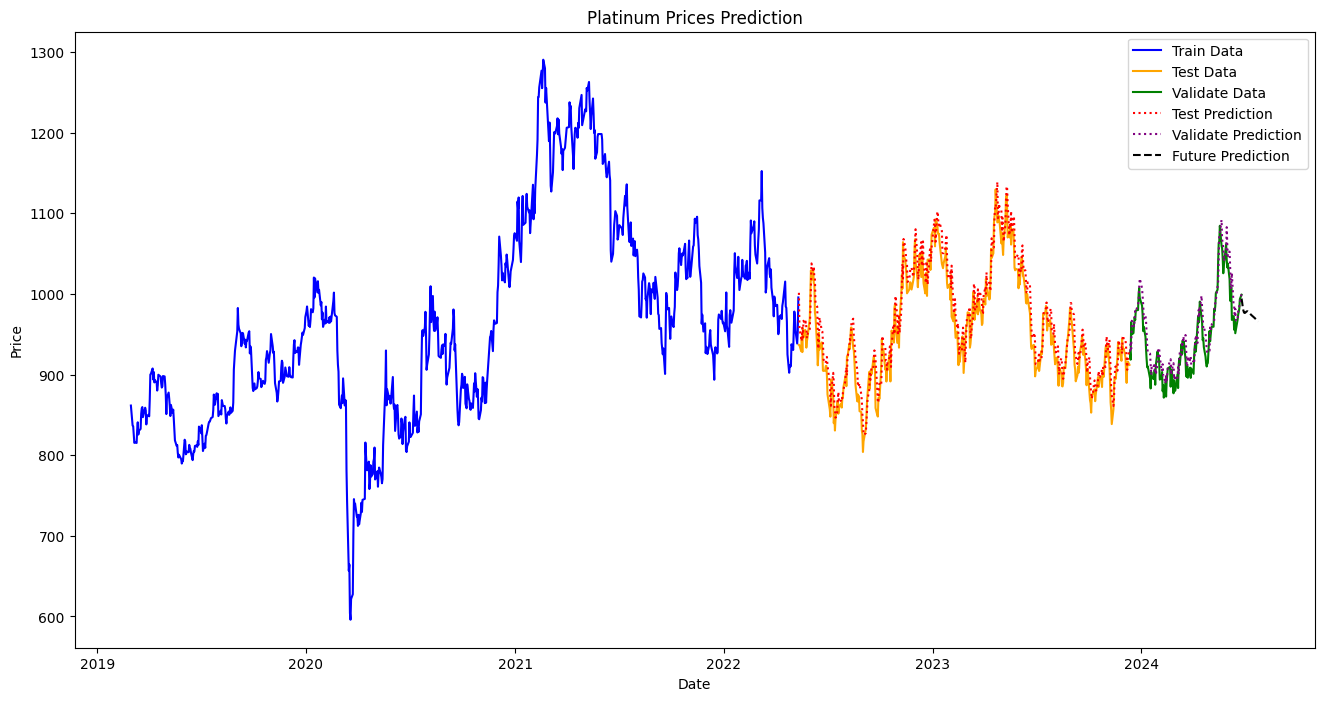

In [140]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [141]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  17.68339745603015
MAPE:  1.8641818341423773
RMSE:  21.757468742933174

** Validate **
MAE:  15.248393352766694
MAPE:  1.6192086135039525
RMSE:  19.124377694525887


In [142]:
# Split dataset 5-3-2 

In [143]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [144]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [145]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [146]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.18237, saving model to save_model_5_3_2.keras
12/12 - 3s - 228ms/step - loss: 0.1824
Epoch 2/80

Epoch 2: loss improved from 0.18237 to 0.09513, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0951
Epoch 3/80

Epoch 3: loss improved from 0.09513 to 0.07277, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0728
Epoch 4/80

Epoch 4: loss improved from 0.07277 to 0.06358, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0636
Epoch 5/80

Epoch 5: loss improved from 0.06358 to 0.06019, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0602
Epoch 6/80

Epoch 6: loss improved from 0.06019 to 0.05515, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0552
Epoch 7/80

Epoch 7: loss improved from 0.05515 to 0.05151, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0515
Epoch 8/80

Epoch 8: loss improved from 0.05151 to 0.05

In [147]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [148]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [149]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [150]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [151]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5995147228240967], [0.6172752380371094], [0.6367087364196777], [0.6571182608604431], [0.6784390211105347], [0.7006115913391113], [0.7235735058784485], [0.7472167015075684], [0.7713664174079895], [0.7957849502563477], [0.8201975226402283], [0.8443302512168884], [0.86794513463974], [0.890863835811615], [0.9129720330238342], [0.9342079162597656], [0.954544186592102], [0.973970353603363], [0.9924807548522949], [1.0100741386413574], [1.0267560482025146], [1.0425411462783813], [1.0574538707733154], [1.0715267658233643], [1.0847959518432617], [1.0972981452941895], [1.1090683937072754], [1.120139479637146], [1.1305428743362427], [1.1403086185455322]]


In [153]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [154]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1012.38287309]
 [1024.72110214]
 [1038.22155252]
 [1052.40004815]
 [1067.21157925]
 [1082.61486271]
 [1098.56650362]
 [1114.99143047]
 [1131.76823692]
 [1148.7317905 ]
 [1165.69120334]
 [1182.45620871]
 [1198.86146707]
 [1214.78308765]
 [1230.14165118]
 [1244.89421822]
 [1259.02182423]
 [1272.51718151]
 [1285.37635635]
 [1297.59847921]
 [1309.18740097]
 [1320.15330783]
 [1330.51317681]
 [1340.28961631]
 [1349.50771919]
 [1358.19299237]
 [1366.36978337]
 [1374.06086622]
 [1381.28810401]
 [1388.07236604]]


In [155]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

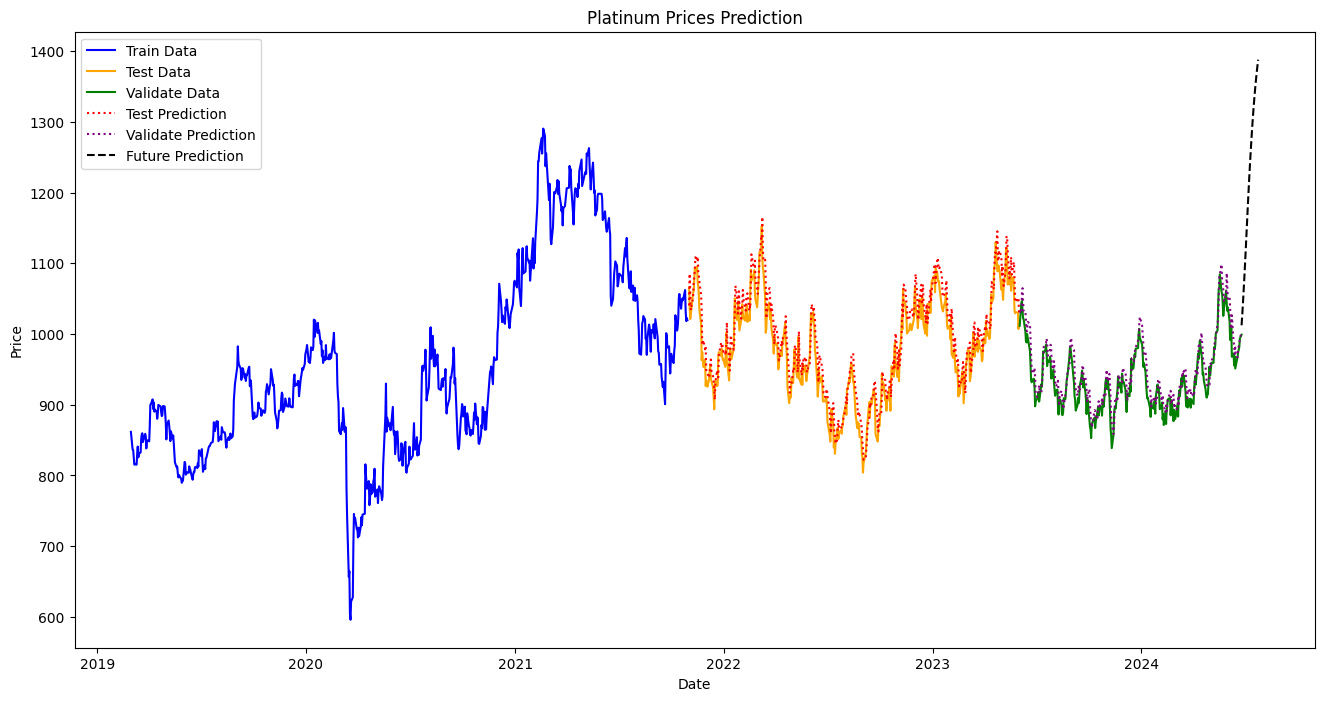

In [159]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [157]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  20.298761262366526
MAPE:  2.079361083992379
RMSE:  24.88952551428186

** Validate **
MAE:  16.378295668982027
MAPE:  1.7569352467328252
RMSE:  20.222241255042334


In [158]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [14.4476, 17.6834, 20.2988],
    "Testing MAPE": [1.4876, 1.8642, 2.0794],
    "Testing RMSE": [18.1176, 21.7575, 24.8895],
    "Validation MAE": [12.9100, 15.2484, 16.3783],
    "Validation MAPE": [1.3688, 1.6192, 1.7569],
    "Validation RMSE": [16.0406, 19.1244, 20.2222],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      14.4476        1.4876       18.1176         12.9100           1.3688          16.0406
 LSTM 6-3-1      17.6834        1.8642       21.7575         15.2484           1.6192          19.1244
 LSTM 5-3-2      20.2988        2.0794       24.8895         16.3783           1.7569          20.2222
